<a href="https://colab.research.google.com/github/juniwarrior/crypto_trading_model/blob/main/Project_TrenMax_en_clase_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT TRENMAX 1/2

In [4]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [5]:
#LEEMOS EL FICHERO DE RENFE

In [6]:
renfe = pd.read_csv("/content/drive/MyDrive/DS/DSC0922_data_engineering/Clases/Project TrenMax/dataset/renfe.csv", sep = ';')

In [7]:
renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [8]:
renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       383568 non-null  object 
 6   TIPO_TARIFA     382225 non-null  object 
 7   CLASE           382225 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [9]:
renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN             0
TIPO_TARIFA        1343
CLASE              1343
PRECIO            28530
dtype: int64

In [10]:

renfe["FECHA_CONSULTA"] = pd.to_datetime(renfe["FECHA_CONSULTA"])
renfe["FECHA_INICIO"] = pd.to_datetime(renfe["FECHA_INICIO"])
renfe["FECHA_FIN"] = pd.to_datetime(renfe["FECHA_FIN"])

In [11]:
renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       383568 non-null  object        
 6   TIPO_TARIFA     382225 non-null  object        
 7   CLASE           382225 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


In [12]:
#PREGUNTA 1

In [13]:
#PREGUNTA 2

In [14]:
#PREGUNTA 3

In [15]:
renfe[renfe.duplicated()].count()

FECHA_CONSULTA    33
FECHA_INICIO      33
FECHA_FIN         33
CIUDAD_ORIGEN     33
CIUDAD_DESTINO    33
TIPO_TREN         33
TIPO_TARIFA       28
CLASE             28
PRECIO            18
dtype: int64

In [16]:
renfe.drop_duplicates(inplace=True)

In [17]:
renfe[renfe.duplicated()].count()

FECHA_CONSULTA    0
FECHA_INICIO      0
FECHA_FIN         0
CIUDAD_ORIGEN     0
CIUDAD_DESTINO    0
TIPO_TREN         0
TIPO_TARIFA       0
CLASE             0
PRECIO            0
dtype: int64

In [18]:
#PREGUNTA 4

In [19]:
renfe2 = renfe.copy()

In [20]:
renfe2["Tiempo_Viaje"] = (renfe2["FECHA_FIN"]-renfe2["FECHA_INICIO"]) / np.timedelta64(1,'m')
renfe2.head()



,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0


In [21]:
renfe2["Tiempo_Viaje"] = (renfe2["FECHA_FIN"]-renfe2["FECHA_INICIO"]) / np.timedelta64(1,'m')


In [22]:
renfe2["Dif_Ini_Bus"] = (renfe2["FECHA_INICIO"]-renfe2["FECHA_CONSULTA"]) / np.timedelta64(1,'m')


In [23]:
renfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383535 entries, 0 to 383567
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383535 non-null  datetime64[ns]
 1   FECHA_INICIO    383535 non-null  datetime64[ns]
 2   FECHA_FIN       383535 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383535 non-null  object        
 4   CIUDAD_DESTINO  383535 non-null  object        
 5   TIPO_TREN       383535 non-null  object        
 6   TIPO_TARIFA     382197 non-null  object        
 7   CLASE           382197 non-null  object        
 8   PRECIO          355020 non-null  float64       
 9   Tiempo_Viaje    383535 non-null  float64       
 10  Dif_Ini_Bus     383535 non-null  float64       
dtypes: datetime64[ns](3), float64(3), object(5)
memory usage: 35.1+ MB


In [24]:
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    renfe2[col + '_HORA'] = renfe2[col].dt.hour
    renfe2[col + '_NOMBREDIA'] = renfe2[col].dt.day_name()
    ##O .dt.weekday_name
    renfe2[col + '_DIA'] = renfe2[col].dt.day
    renfe2[col + '_MES'] = renfe2[col].dt.month
    
    del renfe2[col]

renfe2.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


In [25]:
(renfe2['PRECIO'].isnull().sum() / renfe2["PRECIO"].shape[0]) *100

7.43478430912433

In [26]:
renfe2.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                       0
TIPO_TARIFA                  1338
CLASE                        1338
PRECIO                      28515
Tiempo_Viaje                    0
Dif_Ini_Bus                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
dtype: int64

In [27]:
renfe2[renfe2["PRECIO"].isnull() & renfe2["TIPO_TARIFA"].isnull() & renfe2["CLASE"].isnull()]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
51,SEVILLA,MADRID,AV City,NaN,NaN,NaN,172.0,22293.050000,9,Saturday,27,4,21,Sunday,12,5,23,Sunday,12,5
1063,MADRID,PONFERRADA,TRENHOTEL,NaN,NaN,NaN,377.0,-9443.733333,11,Wednesday,14,8,22,Wednesday,7,8,4,Thursday,8,8
1162,SEVILLA,MADRID,AV City,NaN,NaN,NaN,172.0,8274.266667,3,Monday,29,4,21,Saturday,4,5,23,Saturday,4,5
1250,MADRID,BARCELONA,AVE,NaN,NaN,NaN,150.0,38618.816667,1,Wednesday,15,5,21,Monday,10,6,23,Monday,10,6
1716,MADRID,BARCELONA,AVE,NaN,NaN,NaN,150.0,52177.750000,15,Sunday,12,5,21,Monday,17,6,23,Monday,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381583,MADRID,VALENCIA,AVE,NaN,NaN,NaN,104.0,44203.116667,3,Friday,2,8,20,Sunday,1,9,22,Sunday,1,9
381963,SEVILLA,MADRID,AV City,NaN,NaN,NaN,172.0,12949.100000,21,Saturday,13,4,21,Monday,22,4,23,Monday,22,4
382538,SEVILLA,MADRID,INTERCITY,NaN,NaN,NaN,160.0,13380.350000,12,Saturday,13,4,19,Monday,22,4,21,Monday,22,4
383033,MADRID,BARCELONA,AVE,NaN,NaN,NaN,150.0,42582.783333,7,Sunday,12,5,21,Monday,10,6,23,Monday,10,6


In [28]:
(1338 / renfe2.shape[0])*100

0.34885994759278816

In [29]:
renfe3 = renfe2.copy()

In [30]:
renfe3 = renfe3.dropna(subset = ["TIPO_TARIFA"])

In [31]:
renfe3.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                       0
TIPO_TARIFA                     0
CLASE                           0
PRECIO                      27177
Tiempo_Viaje                    0
Dif_Ini_Bus                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
dtype: int64

In [32]:
renfe3["PRECIO"] = renfe3["PRECIO"].fillna(renfe3["PRECIO"].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
renfe3.isnull().sum()

CIUDAD_ORIGEN               0
CIUDAD_DESTINO              0
TIPO_TREN                   0
TIPO_TARIFA                 0
CLASE                       0
PRECIO                      0
Tiempo_Viaje                0
Dif_Ini_Bus                 0
FECHA_CONSULTA_HORA         0
FECHA_CONSULTA_NOMBREDIA    0
FECHA_CONSULTA_DIA          0
FECHA_CONSULTA_MES          0
FECHA_INICIO_HORA           0
FECHA_INICIO_NOMBREDIA      0
FECHA_INICIO_DIA            0
FECHA_INICIO_MES            0
FECHA_FIN_HORA              0
FECHA_FIN_NOMBREDIA         0
FECHA_FIN_DIA               0
FECHA_FIN_MES               0
dtype: int64

In [34]:
renfe3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382197 entries, 0 to 383567
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CIUDAD_ORIGEN             382197 non-null  object 
 1   CIUDAD_DESTINO            382197 non-null  object 
 2   TIPO_TREN                 382197 non-null  object 
 3   TIPO_TARIFA               382197 non-null  object 
 4   CLASE                     382197 non-null  object 
 5   PRECIO                    382197 non-null  float64
 6   Tiempo_Viaje              382197 non-null  float64
 7   Dif_Ini_Bus               382197 non-null  float64
 8   FECHA_CONSULTA_HORA       382197 non-null  int64  
 9   FECHA_CONSULTA_NOMBREDIA  382197 non-null  object 
 10  FECHA_CONSULTA_DIA        382197 non-null  int64  
 11  FECHA_CONSULTA_MES        382197 non-null  int64  
 12  FECHA_INICIO_HORA         382197 non-null  int64  
 13  FECHA_INICIO_NOMBREDIA    382197 non-null  o

In [35]:
target = ["PRECIO"]

In [36]:
def obtenerlistavariables(dataset):
  lista_num = []
  lista_booleans = []
  lista_cat = []
  for i in dataset:
    if (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and (i not in target) and (len(dataset[i].unique()) != 2):
      lista_num.append(i)
    elif (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and (i not in target) and (len(dataset[i].unique()) == 2):
      lista_booleans.append(i)
    elif (dataset[i].dtype.kind == "O") and i not in (target):
      lista_cat.append(i)
  return lista_num, lista_booleans, lista_cat

In [37]:
l_num, l_bool, l_cat = obtenerlistavariables(renfe3)

In [38]:
l_num

['Tiempo_Viaje',
 'Dif_Ini_Bus',
 'FECHA_CONSULTA_HORA',
 'FECHA_CONSULTA_DIA',
 'FECHA_CONSULTA_MES',
 'FECHA_INICIO_HORA',
 'FECHA_INICIO_DIA',
 'FECHA_INICIO_MES',
 'FECHA_FIN_HORA',
 'FECHA_FIN_DIA',
 'FECHA_FIN_MES']

In [39]:
l_cat

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_CONSULTA_NOMBREDIA',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA']

In [40]:
l_bool

[]

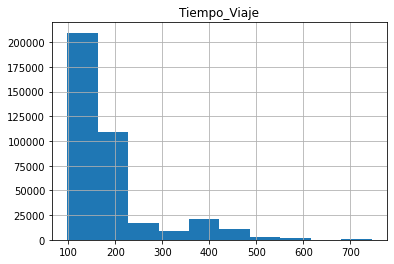

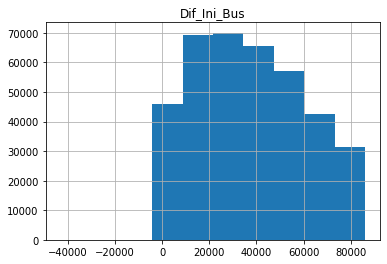

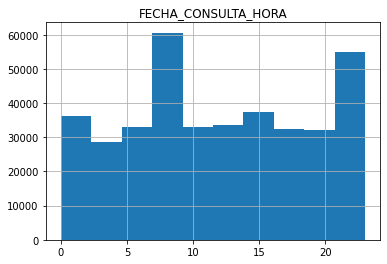

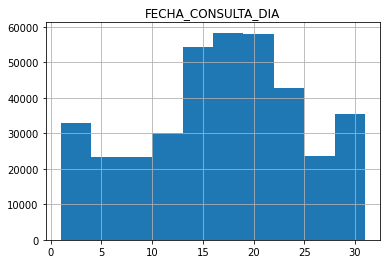

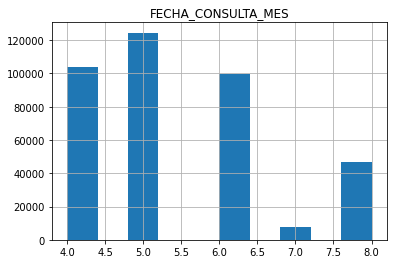

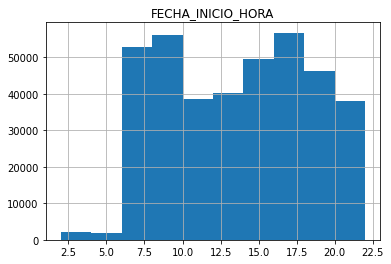

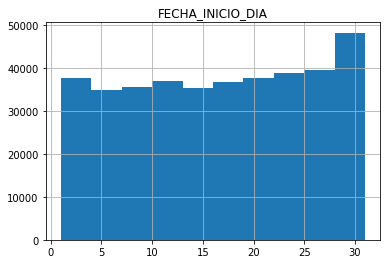

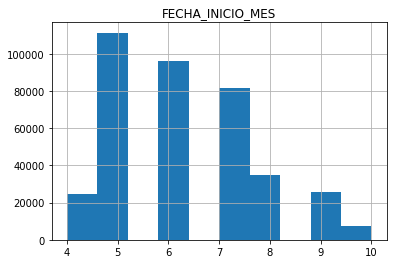

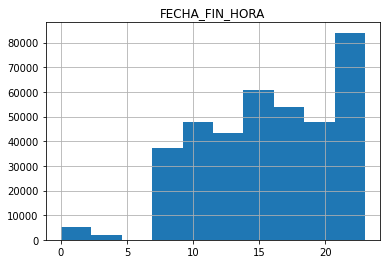

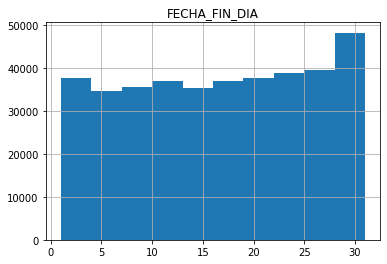

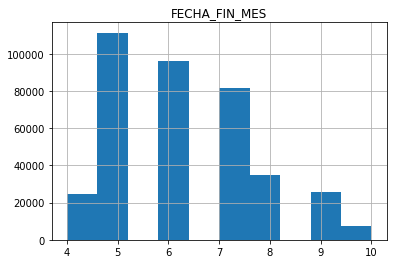

In [50]:
for i in l_num:
  renfe3.hist(i)

In [42]:
for i in l_cat:
  print(renfe3[i].value_counts(),'\n')

MADRID        191083
BARCELONA      61647
SEVILLA        60583
VALENCIA       53266
PONFERRADA     15618
Name: CIUDAD_ORIGEN, dtype: int64 

MADRID        191114
BARCELONA      63847
SEVILLA        60498
VALENCIA       58028
PONFERRADA      8710
Name: CIUDAD_DESTINO, dtype: int64 

AVE          262306
ALVIA         30090
INTERCITY     19491
REGIONAL      18654
AV City       10659
MD-LD          8238
LD             6472
AVE-TGV        5074
R. EXPRES      4639
TRENHOTEL      4259
AVE-LD         3865
AVE-MD         3234
LD-MD          3083
MD-AVE          947
MD              616
LD-AVE          570
Name: TIPO_TREN, dtype: int64 

Promo                      266484
Flexible                    82348
Adulto ida                  24007
Promo +                      9164
COD.PROMOCIONAL               168
Individual-Flexible            13
Mesa                            8
Doble Familiar-Flexible         3
4x100                           1
Grupos Ida                      1
Name: TIPO_TARIFA, dtype:

In [45]:
renfe4 = renfe3[renfe3["Dif_Ini_Bus"]>0]

In [80]:
renfe4.shape

(381553, 20)

In [64]:
renfe5 = renfe4.sort_values(by=['FECHA_CONSULTA_MES','FECHA_CONSULTA_DIA'])
renfe5.head(1)

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
113,MADRID,BARCELONA,AVE,Promo,Preferente,115.65,150.0,54412.483333,23,Thursday,11,4,18,Sunday,19,5,20,Sunday,19,5


In [58]:
renfe5.tail(1)

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
380818,MADRID,SEVILLA,ALVIA,Promo,Turista,47.05,164.0,62725.616667,19,Thursday,22,8,8,Saturday,5,10,11,Saturday,5,10


In [66]:
renfe5['PRECIO'].max()

342.8

In [67]:
renfe5['PRECIO'].min()

0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa129972690>]],
      dtype=object)

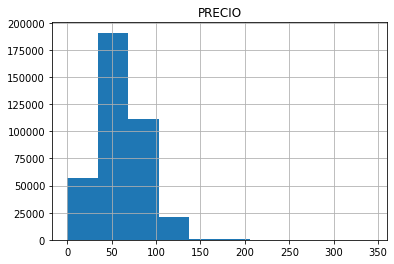

In [68]:
renfe5.hist("PRECIO")

In [75]:
renfe5[renfe5["PRECIO"] == 0]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
136925,BARCELONA,MADRID,AVE-TGV,Flexible,Preferente,0.0,175.0,5016.516667,1,Thursday,13,6,12,Sunday,16,6,15,Sunday,16,6
121961,BARCELONA,MADRID,AVE,4x100,Turista,0.0,190.0,68338.650000,9,Monday,17,6,20,Saturday,3,8,23,Saturday,3,8


In [70]:
renfe6 = renfe5[renfe5["PRECIO"] != 0]


In [71]:
renfe6["PRECIO"].min()

12.85

In [76]:
renfe6["PRECIO"].mean()

61.40882882976377

In [77]:
renfe6[renfe6["FECHA_INICIO_MES"] == 8]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
12369,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,84417.066667,21,Monday,3,6,12,Thursday,1,8,14,Thursday,1,8
13329,PONFERRADA,MADRID,ALVIA,Promo,Turista,33.50,244.0,84634.366667,11,Monday,3,6,6,Thursday,1,8,10,Thursday,1,8
27595,MADRID,PONFERRADA,LD-MD,Flexible,Turista con enlace,54.10,233.0,84452.800000,23,Monday,3,6,14,Thursday,1,8,18,Thursday,1,8
30363,VALENCIA,MADRID,AVE,Promo,Turista,33.65,100.0,84623.566667,15,Monday,3,6,9,Thursday,1,8,11,Thursday,1,8
33720,MADRID,PONFERRADA,LD-MD,Flexible,Turista con enlace,54.10,233.0,85624.200000,3,Monday,3,6,14,Thursday,1,8,18,Thursday,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380894,BARCELONA,MADRID,R. EXPRES,Adulto ida,Turista,43.25,544.0,3096.850000,5,Thursday,22,8,9,Saturday,24,8,18,Saturday,24,8
380936,BARCELONA,MADRID,AVE,Promo,Turista,85.08,190.0,3633.850000,5,Thursday,22,8,18,Saturday,24,8,21,Saturday,24,8
381152,MADRID,VALENCIA,REGIONAL,Adulto ida,Turista,28.35,407.0,7359.833333,3,Thursday,22,8,6,Tuesday,27,8,12,Tuesday,27,8
381527,MADRID,SEVILLA,AVE,Promo,Turista,53.40,152.0,771.133333,1,Thursday,22,8,14,Thursday,22,8,16,Thursday,22,8


In [78]:
renfe6[renfe6["Tiempo_Viaje"] > (4*60)]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,Tiempo_Viaje,Dif_Ini_Bus,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
5558,MADRID,VALENCIA,REGIONAL,Adulto ida,Turista,28.350000,407.0,60869.666667,23,Thursday,11,4,6,Friday,24,5,12,Friday,24,5
5991,MADRID,VALENCIA,REGIONAL,Adulto ida,Turista,28.350000,403.0,56923.466667,23,Thursday,11,4,12,Tuesday,21,5,19,Tuesday,21,5
9570,MADRID,VALENCIA,REGIONAL,Adulto ida,Turista,28.350000,407.0,4790.666667,22,Thursday,11,4,6,Monday,15,4,12,Monday,15,4
14524,MADRID,VALENCIA,AVE-LD,Flexible,Turista,61.436162,303.0,4020.450000,21,Thursday,11,4,16,Sunday,14,4,21,Sunday,14,4
17225,MADRID,SEVILLA,MD-LD,Promo,Turista con enlace,27.500000,461.0,25334.266667,22,Thursday,11,4,13,Monday,29,4,20,Monday,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379115,PONFERRADA,MADRID,TRENHOTEL,Flexible,Turista,45.800000,415.0,72523.366667,17,Thursday,22,8,2,Saturday,12,10,9,Saturday,12,10
379314,PONFERRADA,MADRID,ALVIA,Promo,Turista,33.500000,244.0,7939.566667,17,Thursday,22,8,6,Wednesday,28,8,10,Wednesday,28,8
380894,BARCELONA,MADRID,R. EXPRES,Adulto ida,Turista,43.250000,544.0,3096.850000,5,Thursday,22,8,9,Saturday,24,8,18,Saturday,24,8
381152,MADRID,VALENCIA,REGIONAL,Adulto ida,Turista,28.350000,407.0,7359.833333,3,Thursday,22,8,6,Tuesday,27,8,12,Tuesday,27,8


In [81]:
renfe6["CIUDAD_ORIGEN"].value_counts()

MADRID        190754
BARCELONA      61547
SEVILLA        60480
VALENCIA       53178
PONFERRADA     15592
Name: CIUDAD_ORIGEN, dtype: int64

In [87]:
renfe6.groupby("CLASE")["PRECIO"].max()

CLASE
Cama G. Clase               150.6
Cama Turista                 74.2
Preferente                  342.8
PreferenteSólo plaza H       92.3
Turista                     172.4
Turista Plus                206.8
Turista PlusSólo plaza H     80.6
Turista con enlace           76.4
TuristaSólo plaza H         127.1
Name: PRECIO, dtype: float64

In [90]:
renfe6.groupby("FECHA_INICIO_MES")["PRECIO"].min()

FECHA_INICIO_MES
4     16.60
5     15.45
6     15.70
7     12.85
8     12.85
9     16.60
10    12.85
Name: PRECIO, dtype: float64

In [91]:
renfe6.groupby("TIPO_TREN")["PRECIO"].mean()

TIPO_TREN
ALVIA        57.509471
AV City      47.814479
AVE          67.709830
AVE-LD       47.692158
AVE-MD       57.847361
AVE-TGV      89.563201
INTERCITY    40.435899
LD           52.128058
LD-AVE       61.436162
LD-MD        41.705810
MD           53.502594
MD-AVE       45.885330
MD-LD        40.672223
R. EXPRES    43.391313
REGIONAL     28.785227
TRENHOTEL    48.069061
Name: PRECIO, dtype: float64

In [94]:
bcn_mad = renfe6[(renfe6["CIUDAD_ORIGEN"] == "BARCELONA") &(renfe6["CIUDAD_DESTINO"] == "MADRID")]

In [95]:
bcn_mad.shape

(61547, 20)

In [99]:
bcn_mad.groupby(["TIPO_TREN","FECHA_INICIO_MES"])["PRECIO"].mean()

TIPO_TREN  FECHA_INICIO_MES
AVE        4                    92.506257
           5                    88.082707
           6                    89.701613
           7                    86.029457
           8                    76.988037
           9                    79.936261
           10                   81.509259
AVE-LD     5                    61.436162
           6                    61.436162
           7                    61.436162
           8                    61.436162
AVE-TGV    4                   102.949219
           5                    86.488037
           6                    90.743845
           7                    85.597552
           8                    81.622889
           9                    82.765833
           10                   75.925000
LD-AVE     4                    61.436162
           5                    61.436162
           6                    61.436162
           7                    61.436162
           8                    61.436162
      

In [100]:
mad_val = renfe6[(renfe6["CIUDAD_ORIGEN"] == "MADRID") &(renfe6["CIUDAD_DESTINO"] == "VALENCIA")]

In [102]:
mad_val.groupby(["FECHA_INICIO_MES"])["PRECIO"].mean()

FECHA_INICIO_MES
4     53.392912
5     44.152585
6     45.727039
7     37.393591
8     38.584044
9     38.208927
10    37.098576
Name: PRECIO, dtype: float64